In [1]:
# Frailty Analysis
# This notebook outputs the different 'omics .csv files for each analysis
# Author: Johannes P. Johnson-Martinez (a.k.a. James Johnson), PhD
# v0 - 8/30/2024

# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

# Get the library
from arivale_data_interface import *
import arivale_data_interface as adi

# Set display options
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)
from IPython.display import display

# Apply these settings so the library knows where the data is
adi.apply_isb_config()

# If you want plots to show up in the notebook you need to run this
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 10]

In [12]:
# Obtain frailty score
fi = pd.read_csv('combination_fi_040124.csv')
fi = fi.drop_duplicates('public_client_id')
fi = fi[['public_client_id','merge_fi']]
fi
# 3090 individuals

,public_client_id,merge_fi
0,01001548,0.273529
1,01002192,0.191176
2,01003555,0.245455
3,01003662,0.216176
4,01006695,0.097059
...,...,...
3085,HX999385,0.262687
3086,QIRL,0.184080
3087,ZU273983,0.203483
3088,ZU612255,0.328358


In [2]:
# Get BMI data
bmi = adi.get_snapshot('weight_monthly')
bmi = bmi[['public_client_id','days_in_program','BMI_CALC']]
bmi = bmi.sort_values('days_in_program',ascending=True)
bmi = bmi.sort_values('public_client_id',ascending=True)
bmi = bmi.drop('days_in_program', axis=1)
bmi = bmi.drop_duplicates('public_client_id')
#bmi = bmi.set_index('public_client_id')
bmi = bmi.dropna()
bmi #5550 individuals

,public_client_id,BMI_CALC
0,01000261,22.594123
4,01000552,31.119467
5,01001181,39.047808
11,01001298,25.624142
14,01001548,36.119222
...,...,...
46498,QIRL,28.726489
46563,ZU273983,30.984144
46567,ZU612255,35.122878
46569,ZU621944,51.577264


In [3]:
# Blood plasma serum metabolites snapshot:
# Get the metabolomics data:
rawmet=adi.get_snapshot('metabolomics_corrected')
rawmet = rawmet.sort_values('days_in_program',ascending=True) # Sort by days
rawmet = rawmet.sort_values('public_client_id',ascending=True) # Sort by PCI
rawmet=rawmet.drop(columns={"month","weekday","season",'sample_id','days_in_program','days_since_first_call','days_since_first_draw'}) # Drop unneeded columns
rawmet = rawmet.drop_duplicates('public_client_id') # This line drops duplicates from this snapshot from 3305 participants -> 2043
met_nonnancounts=(~rawmet.isna()).sum() # sum up times any columns have non-NA values

# Optional filtering parameters below; the default is to leave them disabled
#rawmet = rawmet.loc[:, met_nonnancounts/rawmet.shape[0] >= 0.70] # this sum of zero values/num of total rows should less than 30% to proceed with the cohort
#rawmet = rawmet.dropna(axis = 0, how = 'all') # Drop patients with all NaN values
#rawmet = rawmet.dropna(axis = 1, how = 'all') # Drop patients with all NaN values

rawmet = rawmet.fillna(rawmet.iloc[:,5:].median()) # Impute df NaNs with median
rawmet

,public_client_id,35,50,55,62,71,93,98,111,112,117,132,136,144,158,171,179,180,181,182,189,192,194,197,207,209,212,229,231,234,235,240,241,244,249,250,252,254,266,267,272,273,275,278,279,297,302,310,313,327,330,331,338,339,340,342,344,355,356,358,361,363,376,381,391,393,397,407,409,415,424,432,439,444,445,452,460,461,480,482,491,498,501,503,504,512,519,533,535,537,561,563,564,565,566,567,572,796,798,799,...,999947802,999947804,999947815,999947818,999947820,999947905,999947909,999947912,999947917,999947921,999947922,999947929,999947936,999947937,999947938,999947940,999947943,999947955,999947959,999947960,999947967,999947971,999947977,999947988,999947992,999947993,999947997,999948001,999948003,999948009,999948013,999948016,999948019,999948025,999948047,999948048,999948076,999948081,999948094,999948185,999949463,999949512,999949515,999949517,999949521,999949525,999949529,999949532,999949546,999949555,999949557,999949592,999949637,999949675,999949679,999949681,999949688,999949792,999949883,999952025,999952280,999952286,999952483,999952501,999952502,999952504,999952524,999952530,999952533,999952548,999952636,999952640,999952647,999952655,999952661,999952662,999952773,999952797,999952839,999952843,999952862,999952865,999952866,999952867,999952870,999952877,999952892,999952906,999952909,999953065,999953114,999953157,999953172,999953266,999953267,999954831,999954832,999954834,999954839,999954840
0,01000261,0.972222,2.568898,1.155771,0.824435,1.666061,0.947589,0.772955,0.716831,1.193115,1.265563,5.372793,24.532961,1.615655,1.289964,1.135706,0.815813,0.710183,0.986860,0.603223,1.421159,1.128161,1.186826,1.186918,1.154610,2.183882,1.129249,0.920111,1.374374,1.891255,0.819227,1.204927,1.203517,1.017136,0.754307,0.921926,1.530622,0.389302,1.364602,1.437235,1.900831,1.702655,0.954904,2.320103,0.708487,4.268696,2.899063,0.816147,3.386740,1.340840,1.101887,0.785114,0.943850,0.875629,1.076899,1.014633,1.051367,1.239469,2.139945,1.987275,3.027573,1.165933,1.031538,0.941901,1.053787,0.800363,1.165150,1.364448,1.219670,1.115540,0.832081,1.370398,0.920689,1.555217,1.408812,0.800073,1.035181,0.934017,1.245427,1.512853,0.956513,1.512646,4.848959,1.096566,2.289297,1.570808,1.039696,0.889427,0.980195,1.237122,0.948468,1.329892,1.461135,1.029702,1.077272,0.837020,0.924483,0.496321,1.188124,0.933092,...,0.739217,0.754325,1.781123,0.462004,0.689655,1.012121,0.840486,0.996306,1.038514,0.658442,1.028650,1.008395,1.414790,0.377657,0.924388,0.567646,1.06279,0.891436,1.069549,4.824420,1.007514,0.671550,0.446172,0.809453,1.005197,1.266994,0.903881,4.729395,0.990263,1.144651,1.010123,0.969863,0.915611,2.717418,0.790954,1.002742,1.011400,1.053664,0.999294,0.973291,0.546438,1.206396,1.436551,1.002381,1.585908,1.003976,0.576202,0.954528,0.550047,0.483140,0.494334,0.689787,1.214707,1.008948,1.310367,0.523531,1.014521,1.012099,0.570142,0.878512,1.027517,1.266454,0.934197,1.365642,1.165906,0.659998,0.999463,1.001914,1.371351,1.003139,0.933515,1.089485,0.997586,1.944974,1.493849,1.206122,0.980356,0.608218,0.847312,0.856545,1.255362,1.678183,0.956583,1.144330,1.292103,0.715138,6.266364,1.155240,1.114859,1.161431,1.045152,0.592175,0.437347,0.615018,0.923405,1.106525,1.129321,1.136554,0.376786,0.981557
2,01001621,2.540378,0.568236,1.328050,NaN,1.003031,1.366908,0.967574,1.957150,0.928533,1.164143,0.456719,1.732912,1.013904,1.103766,0.893238,0.963846,0.990913,1.504583,0.851745,1.011125,0.802254,1.359346,0.408849,1.004298,1.213243,1.080032,0.844420,1.254205,0.603340,1.733442,1.165452,1.508164,1.460673,0.980826,0.553575,1.147789,1.155400,0.980912,1.052493,0.767742,0.971487,1.134848,0.474432,1.844409,0.664441,1.001814,1.074128,0.661147,0.387048,1.958801,0.443924,1.060663,7.146501,1.029642,0.933483,1.562872,0.792702,0.905864,0.981730,0.806218,1.049168,1.026207,0.556103,1.420774,0.800363,0.874352,0.797111,1.097956,0.981784,0.825712,0.795934,0.978952,0.829953,0.759106,0.824048,0.923527,0.800240,1.007761,0.730528,0.956513,0.801623,1.313013,1.041510,0.931913,1.223909,1.012588,1.4

In [4]:
#get the proteomics dataframe:
pro = adi.get_snapshot('proteomics_corrected')
pro = pro.sort_values(by='days_in_program')

pro = pro.drop_duplicates('public_client_id')
pro = pro.set_index('public_client_id')
pro = pro.iloc[:,14:]
pro = pro.drop(columns=['month','weekday','season'])

# Optional filtering parameters below; the default is to leave them enabled
pro_zerocounts=(pro == 0).sum() # sum up times any columns have zero values
pro_nonnancounts=(~pro.isna()).sum() # sum up times any columns have non-NA values
pro = pro.loc[:, pro_nonnancounts/pro.shape[0] >= .50] #this sum of non-NA count values/num of total rows should be >= 50% to proceed with the cohort

pro = pro.fillna(pro.median()) #impute with the median
pro = pro.reset_index('public_client_id')

#Get the proteomics metadata df:
pro_m = adi.get_snapshot('proteomics_metadata')
pro_m = pro_m.drop_duplicates()
common_rows = set(pro.columns)
common_columns = set(pro_m['name'])
common = pd.Series(list(common_rows.intersection(common_columns)))
pro_m = pro_m[pro_m['name'].isin(common)]
pro_m.to_csv('proteomics_metadata_table.csv', index = False)

pro
#2859 participants

,public_client_id,days_in_program,days_since_first_call,days_since_first_draw,CVD2_O00182,CVD2_O00220,CVD2_O00253,CVD2_O14763,CVD2_O14836,CVD2_O43915,CVD2_O94907,CVD2_P00797,CVD2_P01127,CVD2_P01241,CVD2_P01730,CVD2_P01833,CVD2_P02760,CVD2_P04179,CVD2_P04792,CVD2_P05231,CVD2_P06858,CVD2_P07204,CVD2_P07585,CVD2_P07711,CVD2_P09237,CVD2_P09341,CVD2_P09601,CVD2_P09874,CVD2_P10147,CVD2_P12104,CVD2_P12931,CVD2_P13726,CVD2_P16860,CVD2_P18510,CVD2_P19883,CVD2_P21583,CVD2_P21980,CVD2_P22004,CVD2_P24394,CVD2_P25116,CVD2_P26022,CVD2_P27352,CVD2_P29965,CVD2_P31994,CVD2_P31997,CVD2_P35218,CVD2_P35318,CVD2_P35442,CVD2_P35475,CVD2_P39900,CVD2_P40225,CVD2_P41159,CVD2_P47992,CVD2_P49763,CVD2_P51161,CVD2_P51888,CVD2_P78380,CVD2_Q02763,CVD2_Q04760,CVD2_Q12866,CVD2_Q13043,CVD2_Q13219,CVD2_Q14005,CVD2_Q14116,CVD2_Q14242,CVD2_Q15109,CVD2_Q15389,CVD2_Q16651,CVD2_Q16698,CVD2_Q76LX8,CVD2_Q8IW75,CVD2_Q8IYS5,"CVD2_Q8NEV9,Q14213",CVD2_Q8TAD2,CVD2_Q92583,CVD2_Q96D42,CVD2_Q96IQ7,CVD2_Q99075,CVD2_Q99523,CVD2_Q99895,CVD2_Q9BQ51,CVD2_Q9BQR3,CVD2_Q9BUD6,CVD2_Q9BWV1,CVD2_Q9BYF1,CVD2_Q9GZV9,CVD2_Q9HB29,CVD2_Q9NQ25,CVD2_Q9NSA1,CVD2_Q9UEW3,CVD2_Q9UIB8,CVD2_Q9UJM8,CVD2_Q9UK05,CVD2_Q9UKP3,CVD2_Q9Y6K9,CVD2_Q9Y6Q6,CVD3_NT-proBNP,CVD3_O00175,CVD3_O00300,CVD3_O14798,...,CVD3_Q9H2A7,CVD3_Q9HCB6,CVD3_Q9HD89,CVD3_Q9NPY3,CVD3_Q9NQ76,CVD3_Q9UBR2,CVD3_Q9UM47,CVD3_Q9Y275,CVD3_Q9Y624,INF_O00300,INF_O14625,INF_O14788,INF_O15169,INF_O15444,INF_O43508,INF_O43557,INF_O95630,INF_O95750,INF_O95760,INF_P00749,INF_P00813,INF_P01135,INF_P01137,INF_P01138,INF_P01374,INF_P01375,INF_P01579,INF_P01583,INF_P02778,INF_P03956,INF_P05112,INF_P05113,INF_P05231,INF_P06127,INF_P09238,INF_P09341,INF_P09603,INF_P10145,INF_P10147,INF_P13232,INF_P13236,INF_P13500,INF_P13725,INF_P14210,INF_P14784,INF_P15018,INF_P15692,INF_P20783,INF_P21583,INF_P22301,INF_P25942,INF_P28325,INF_P29460,INF_P35225,INF_P39905,INF_P42702,INF_P42830,INF_P49771,INF_P50225,INF_P50591,INF_P51671,INF_P55773,INF_P60568,INF_P78423,INF_P78556,INF_P80075,INF_P80098,INF_P80162,INF_P80511,INF_Q07011,INF_Q07325,INF_Q08334,INF_Q13007,INF_Q13261,INF_Q13291,INF_Q13478,INF_Q13541,INF_Q13651,INF_Q14116,INF_Q14790,INF_Q16552,INF_Q5T4W7,INF_Q8IXJ6,INF_Q8N6P7,INF_Q8NF90,INF_Q8NFT8,INF_Q8WWJ7,INF_Q969D9,INF_Q99616,INF_Q99731,INF_Q99748,INF_Q9BZW8,INF_Q9GZV9,INF_Q9H5V8,INF_Q9NRJ3,INF_Q9NSA1,INF_Q9NYY1,INF_Q9NZQ7,INF_Q9P0M4,INF_Q9UHF4
0,01324699,0,0.0,0,9.231985,2.592163,4.438840,5.415310,9.117643,7.589893,9.562513,8.300667,11.069715,6.473435,5.561110,7.255285,8.283945,9.852695,11.452455,3.211300,10.077635,10.447515,5.070775,7.729768,8.528125,9.854055,12.027368,3.165315,2.339105,9.423150,8.109230,7.062770,1.367710,3.249165,11.596135,10.620235,8.838168,5.500822,2.392595,9.634272,3.766472,6.748795,7.775143,3.388507,3.500265,2.314660,7.373947,6.007297,6.213300,6.991492,3.824630,3.732428,5.361755,8.255590,2.468195,6.961272,6.388730,8.067500,6.832533,6.330823,7.276130,2.972825,6.665920,8.616800,6.059638,5.386335,9.770857,8.925230,7.721185,5.933065,4.796880,10.739845,5.268065,2.728345,8.884775,7.164013,3.020065,5.423430,8.242772,10.359713,3.078232,9.943740,10.864230,5.554510,3.449190,2.354325,4.355335,3.116550,3.264810,7.446648,6.594798,1.785605,7.370555,5.521570,7.470175,5.868290,3.974060,6.916073,4.028932,6.941217,...,5.947933,1.381960,6.852100,11.709380,5.949363,5.354328,4.825025,7.133913,7.167890,10.112685,7.499920,3.927450,5.415790,5.295350,11.034075,4.161560,5.672920,8.066210,1.466040,9.880740,4.357900,3.321510,6.845095,2.353550,4.729975,0.363915,0.834370,1.702635,8.079620,13.062245,0.065260,-0.699615,2.432660,4.559845,6.090595,10.722110,9.919035,5.474930,1.191375,3.030650,2.412410,10.767175,3.800345,8.628870,1.559440,-0.587385,9.735700,2.694700,10.120920,3.525400,10.940965,6.653205,4.938755,-0.134755,2.296010,3.450235,11.737640,10.008455,4.064375,8.529485,8.174590,9.877175,0.244235,6.417265,0.832780,8.409350,2.417270,7.924395,1.883505,6.830055,6.769730,6.446970,-0.145285,0.696165,3.101615,7.466350,7.782365,-0.137720,8.643360,3.167800,0.762185,0.09

In [5]:
#Get the clinical laboratory chemistries data:
chem=adi.get_snapshot('chemistries')
chemdf = chem.sort_values(by='days_in_program') #keep only first date data
chemdf = chemdf.drop_duplicates(subset='public_client_id')
dip = chemdf[['public_client_id','days_in_program']]
chemdf = chemdf.set_index('public_client_id')
chemdf = chemdf.iloc[:,12:] #keep only relevant columns

# filtering parameters below
chem_nonnancounts=(~chemdf.isna()).sum() # sum up times any columns have non-NA values
#chemdf = chemdf.loc[:, chem_nonnancounts/chemdf.shape[0] >= .70] #this sum of non-NA count values/num of total rows should >= 70% to proceed with the cohort
chemdf = chemdf.fillna(chemdf.median()) # impute with the median

chemdf = chemdf.dropna()
chemdf = chemdf.reset_index()
chemdf = pd.merge(dip,chemdf,on=['public_client_id'])
chemdf = chemdf.drop('days_in_program', axis=1)
chemdf 
#4881 participants

,public_client_id,"ADIPONECTIN, SERUM",ALAT (SGPT),ALBUMIN,ALKALINE PHOSPHATASE,"ANTIOXID CAP, TOTAL",ARACHIDONIC ACID,"ARSENIC, BLOOD",ASAT (SGOT),BASOPHILS,BASOPHILS ABSOLUTE,"BILIRUBIN, DIRECT","BILIRUBIN, INDIRECT","BILIRUBIN, TOTAL",BUN/CREAT RATIO,CALCIUM,CARBON DIOXIDE (CO2),CHLORIDE,"CHOLESTEROL, TOTAL","COPPER, RBC","CREATININE ENZ, SER",CRP HIGH SENSITIVITY,DHA,DPA,EOSINOPHILS,EOSINOPHILS ABSOLUTE,EPA,EPA/AA,FERRITIN,"FOLIC ACID, SERUM","GFR, MDRD","GFR, MDRD, AFRICAN AM",GGT,GLOBULIN,GLUCOSE,"GLUTATHIONE, TOTAL",GLYCOHEMOGLOBIN A1C,HDL CHOL DIRECT,HDL LARGE,HDL PARTICLE NUMBER,HDL PARTICLE PERCENTILE,HDL SIZE PERCENTILE,HEMATOCRIT,HEMOGLOBIN,HOMA-IR,"HOMOCYSTEINE, SERUM",IDL PARTICLE NUMBER,IL-6,IL-8,IMMATURE GRANULOCYTES,IMMATURE GRANULOCYTES ABSOLUTE,INSULIN,LACTIC DEHYDROGENASE,LARGE HDL PARTICLE PERCENTILE,LARGE LDL PARTICLE NUMBER,LARGE MED HDL PARTICLE NUMBER,LARGE MED VLDL PARTICLE NUMBER,LARGE VLDL PARTICLE PERCENTILE,LDL MEDIUM,LDL PARTICLE NUMBER,LDL PEAK SIZE,LDL SIZE PERCENTILE,LDL SMALL,LDL-CHOL CALCULATION,LDL_SIZE,"LEAD, BLOOD",LINOLEIC_ACID,LPIR SCORE PERCENTILE,LPIR_SCORE,LP_PLA2,LYMPHOCYTES,LYMPHOCYTES ABSOLUTE,"MAGNESIUM, SERUM","MANGANESE, SERUM",MCH,MCHC,MCV,MEDIUM HDL PARTICLE NUMBER,MEDIUM VLDL PARTICLE NUMBER,"MERCURY, BLOOD",METHYLMALONIC ACID,MONOCYTES,MONOCYTES ABSOLUTE,MPV,"NEUTROPHIL, SEGS",NEUTROPHILS ABSOLUTE,OMEGA-3 INDEX,OMEGA-6/OMEGA-3 RATIO,OMEGA_3_TOTAL,OMEGA_6_TOTAL,OXLDL,"PAI-1 ANTIGEN, QNT",PFFA,PHOSPHORUS INORGANIC,PLATELET COUNT,PLATELET COUNT THOUSAND,POTASSIUM,PROT AND PFFA CALC,PROTEIN,"PROTEIN, TOTAL SERUM",QUICKI,RDW,RED CELL COUNT,"SELENIUM, SERUM",SMALL HDL PARTICLE NUMBER,SMALL LDL PARTICLE PERCENTILE,SMALL VLDL PARTICLE NUMBER,SODIUM,SUPEROX DISMUT SOD,TNF-ALPHA,TOTAL NEUTROPHILS,TOTAL NEUTROPHILS AB,TRIGLYCERIDES,Triglyceride HDL Ratio,UREA NITROGEN,URIC ACID,"VITAMIN D, 25-OH TOT","VITAMIN D2, 25-OH","VITAMIN D3, 25-OH",VLDL LDL PARTICLE NUMBER,VLDL PARTICLE NUMBER,VLDL SIZE PERCENTILE,VLDL TRIGLYCERIDES,WHITE CELL COUNT,ZINC,"ZINC, RBC",leptin,zinc_plasma_or_serum
0,01074064,9.3,11.0,4.1,41.0,1243.1,10.7,2.0,17.0,1.0,0.0,0.1,0.5,0.2,17.0,9.0,24.0,101.0,165.0,0.63,0.76,2.74,3.1,0.8,3.0,0.1,0.7,0.095491,27.0,10.6,103.0,118.0,17.0,2.1,90.0,166.0,5.3,69.0,5896.0,37.80,86.3,88.6,42.2,13.8,1.111111,11.4,143.0,1.9,3.8,0.0,0.0,5.0,136.0,94.0,383.0,13.8,3.7,26.8,227.0,965.0,221.7,57.3,328.0,81.0,20.9,0.0,24.2,13.0,25.0,180.0,44.0,1.8,1.9,0.6,30.7,32.7,94.0,0.4,3.9,1.6,163.0,7.0,0.3,9.7,60.7,3.23,4.6,8.5,4.6,38.9,31.0,95.5,98.0,3.5,222000.0,229.0,4.5,596.0,498.0,6.2,0.147494,13.0,4.49,141.0,24.0,33.0,34.1,138.0,34.8,0.3,45.0,1.8,75.0,1.086957,13.0,4.7,44.7,4.0,34.0,1037.0,36.4,30.4,39.4,3.9,1134.0,10.5,21.1,83.0
1,01920535,19.4,12.0,4.0,68.0,1243.1,10.9,2.0,17.0,0.6,0.0,0.1,0.5,0.2,14.0,9.1,23.0,104.0,225.0,0.63,0.86,1.04,2.5,1.1,2.0,0.1,0.5,0.095491,162.0,7.3,75.0,87.0,10.0,2.5,95.0,220.0,5.5,61.0,5896.0,30.00,74.0,54.4,42.1,14.0,1.172840,11.4,71.0,1.3,7.4,0.0,0.0,5.0,136.0,73.9,620.0,17.2,14.5,40.9,227.0,1217.0,221.7,80.0,132.0,147.0,22.1,0.0,29.7,32.4,25.0,202.0,32.8,1.7,2.2,0.6,30.3,33.4,91.0,8.3,14.4,2.2,166.0,7.0,0.4,9.7,60.7,3.23,4.1,10.7,4.1,43.7,41.0,95.5,99.0,3.5,222000.0,239.0,4.3,636.0,540.0,6.5,0.147494,13.6,4.65,141.0,17.0,38.0,30.7,141.0,34.8,0.9,57.0,3.0,86.0,1.409836,12.0,5.5,17.8,4.0,34.0,1309.0,45.9,37.1,53.2,5.3,1006.0,10.5,21.1,83.0
2,01729568,17.6,57.0,4.3,49.0,1243.1,11.6,2.0,46.0,0.0,0.0,0.1,0.5,0.7,15.0,9.5,25.0,106.0,234.0,0.63,0.85,1.22,3.3,1.4,3.0,0.1,1.0,0.095491,196.0,19.9,68.0,78.0,17.0,1.7,91.0,373.5,5.3,62.0,5896.0,33.80,74.0,54.4,40.7,13.9,2.134568,7.8,71.0,1.8,12.4,0.0,0.0,9.5,136.0,73.9,620.0,17.2,14.5,40.9,227.0,1771.0,221.7,80.0,419.0,153.0,21.7,0.0,24.4,32.4,25.0,202.0,44.0,1.9,2.1,0.6,32.2,34.2,94.0,8.3,14.4,1.7,180.0,10.0,0.4,9.7,60.7,3.23,5.7,7.0,5.7,39.8,68.0,95.5,99.0,3.5,222000.0,219.0,4.3,636.0,540.0,6.0,0.147494,13.9,4.32,141.0,17.0,38.0,30.7,144.0,34.8,1.1,43.0,1.9,94.0,1.516129,13.0,4.8,44.2,4.0,34.0,1309.0,45.9,37.1,53.2,4.3

In [6]:
#Now, get the Assessments data
bio=adi.get_snapshot('clients')
a = bio['sex']
b = bio['age']
c = bio['public_client_id']
biodf = pd.DataFrame({'sex':a, 'age':b, 'public_client_id':c})
biodf = biodf[['sex','age','public_client_id']]
#biodf = biodf.set_index('public_client_id')
biodf #6133 individuals

,sex,age,public_client_id
0,M,54.0,01000552
1,F,52.0,01000978
2,F,48.0,01001181
3,F,61.0,01001298
4,F,31.0,01001467
...,...,...,...
6128,F,44.0,QIRL
6129,F,32.0,ZU273983
6130,F,35.0,ZU612255
6131,F,37.0,ZU621944


In [7]:
#Get the gut microbiome 16s data
asvs = pd.read_csv("/proj/arivale/microbiome/16S_processed/asvs.csv")
samples = pd.read_csv("/proj/arivale/microbiome/16S_processed/metadata.csv")
merged = pd.merge(asvs, samples[["id", "public_client_id", "sex", "age", "days_in_program"]], on="id")

tax = pd.read_csv("/proj/arivale/microbiome/16S_processed/taxonomy.csv")
tax = tax.drop("sequence", axis=1).rename(columns={"id": "hash"})
merged = pd.merge(merged, tax, on="hash")

#Create taxa genus df
taxa = merged[['public_client_id','count','Kingdom','Phylum','Class','Order','Family','Genus',#'Species'
              ]]

#Add prefixes to taxa names for consistency
taxa = taxa.assign(Name = 'taxa_' + taxa.Kingdom.astype(str) + '.' + \
  taxa.Phylum.astype(str) + '.' + taxa.Class.astype(str) + '.' + \
  taxa.Order.astype(str) + '.' + taxa.Family.astype(str) + '.' + \
  taxa.Genus.astype(str) + '.'# + taxa.Species.astype(str) \
                  )

taxa = taxa.sort_values(by = ['public_client_id'])

#create MultiIndex for pivot table
arrays = [taxa['public_client_id'],taxa['Name']]
index = pd.MultiIndex.from_arrays(arrays, names = ('public_client_id','Name'))

#pivot df into one with taxa as columns and PCI as index with counts as values
name_melt = pd.DataFrame(data = {'count':taxa['count'].to_numpy()}, index = index)

name_pivot = name_melt.pivot_table(index='public_client_id', columns='Name', values='count',aggfunc='sum', fill_value = 0)
name_pivot = name_pivot.dropna(how = 'any')

# create a CLR-transformed baseline df of the 16s data for downstream analyses:
clr_pivot = name_pivot + 1 #add psuedocount to logarithmically compute downstream
from skbio.stats.composition import clr
clr_pivot = pd.DataFrame(clr(clr_pivot), index =clr_pivot.index, columns = clr_pivot.columns)
clr_pivot.to_csv('clrtaxa.csv')

taxa = name_pivot

# filtering parameters below:
taxa_zerocounts=(taxa == 0).sum() # sum up times any columns have zero values
taxa_nonnancounts=(~taxa.isna()).sum() # sum up times any columns have non-NA values
taxa = taxa.fillna(taxa.median()) #replace NaN values with the median of each column
#taxa = taxa.set_index('public_client_id')
taxa = taxa.reset_index()
taxa = taxa.drop_duplicates(subset='public_client_id')
taxa.public_client_id = taxa.public_client_id.values.astype(str)

# Obtain vendor from snapshot
dash = adi.get_snapshot('microbiome_diversity')
dash = dash.sort_values('days_in_program',ascending=True) # Sort by days in program first
dash = dash.drop_duplicates(subset='public_client_id') # drop duplicate PCIs, keeping first day
dash = dash.sort_values('public_client_id',ascending=True)
dash = dash.set_index('public_client_id')
dash = dash[['vendor_dashboard']]
dash = dash[dash.notna()]
dash = dash.reset_index()

taxa_alone = pd.merge(biodf, dash, on = ['public_client_id'])
taxa_alone = pd.merge(taxa_alone, taxa, on=['public_client_id'])
taxa_alone.to_csv('taxa_alone.csv', index = False)
taxa_alone
#3603 individuals

,sex,age,public_client_id,vendor_dashboard,taxa_Archaea.Euryarchaeota.Methanobacteria.Methanobacteriales.Methanobacteriaceae.Methanobrevibacter.,taxa_Archaea.Euryarchaeota.Methanobacteria.Methanobacteriales.Methanobacteriaceae.Methanosphaera.,taxa_Archaea.Euryarchaeota.Methanobacteria.Methanobacteriales.Methanobacteriaceae.nan.,taxa_Archaea.Euryarchaeota.Thermoplasmata.Methanomassiliicoccales.Methanomassiliicoccaceae.Methanomassiliicoccus.,taxa_Archaea.Euryarchaeota.Thermoplasmata.Methanomassiliicoccales.Methanomethylophilaceae.Candidatus_Methanogranum.,taxa_Archaea.Euryarchaeota.Thermoplasmata.Methanomassiliicoccales.Methanomethylophilaceae.Candidatus_Methanomethylophilus.,taxa_Archaea.Euryarchaeota.Thermoplasmata.Methanomassiliicoccales.Methanomethylophilaceae.nan.,taxa_Bacteria.Actinobacteria.Acidimicrobiia.Microtrichales.nan.nan.,taxa_Bacteria.Actinobacteria.Actinobacteria.Actinomycetales.Actinomycetaceae.Actinobaculum.,taxa_Bacteria.Actinobacteria.Actinobacteria.Actinomycetales.Actinomycetaceae.Actinomyces.,taxa_Bacteria.Actinobacteria.Actinobacteria.Actinomycetales.Actinomycetaceae.Actinotignum.,taxa_Bacteria.Actinobacteria.Actinobacteria.Actinomycetales.Actinomycetaceae.Arcanobacterium.,taxa_Bacteria.Actinobacteria.Actinobacteria.Actinomycetales.Actinomycetaceae.F0332.,taxa_Bacteria.Actinobacteria.Actinobacteria.Actinomycetales.Actinomycetaceae.Mobiluncus.,taxa_Bacteria.Actinobacteria.Actinobacteria.Actinomycetales.Actinomycetaceae.Trueperella.,taxa_Bacteria.Actinobacteria.Actinobacteria.Actinomycetales.Actinomycetaceae.Varibaculum.,taxa_Bacteria.Actinobacteria.Actinobacteria.Actinomycetales.Actinomycetaceae.nan.,taxa_Bacteria.Actinobacteria.Actinobacteria.Bifidobacteriales.Bifidobacteriaceae.Aeriscardovia.,taxa_Bacteria.Actinobacteria.Actinobacteria.Bifidobacteriales.Bifidobacteriaceae.Alloscardovia.,taxa_Bacteria.Actinobacteria.Actinobacteria.Bifidobacteriales.Bifidobacteriaceae.Bifidobacterium.,taxa_Bacteria.Actinobacteria.Actinobacteria.Bifidobacteriales.Bifidobacteriaceae.Gardnerella.,taxa_Bacteria.Actinobacteria.Actinobacteria.Bifidobacteriales.Bifidobacteriaceae.Neoscardovia.,taxa_Bacteria.Actinobacteria.Actinobacteria.Bifidobacteriales.Bifidobacteriaceae.Parascardovia.,taxa_Bacteria.Actinobacteria.Actinobacteria.Bifidobacteriales.Bifidobacteriaceae.Pseudoscardovia.,taxa_Bacteria.Actinobacteria.Actinobacteria.Bifidobacteriales.Bifidobacteriaceae.Scardovia.,taxa_Bacteria.Actinobacteria.Actinobacteria.Bifidobacteriales.Bifidobacteriaceae.nan.,taxa_Bacteria.Actinobacteria.Actinobacteria.Corynebacteriales.Corynebacteriaceae.Corynebacterium.,taxa_Bacteria.Actinobacteria.Actinobacteria.Corynebacteriales.Corynebacteriaceae.Corynebacterium_1.,taxa_Bacteria.Actinobacteria.Actinobacteria.Corynebacteriales.Corynebacteriaceae.Lawsonella.,taxa_Bacteria.Actinobacteria.Actinobacteria.Corynebacteriales.Mycobacteriaceae.Mycobacterium.,taxa_Bacteria.Actinobacteria.Actinobacteria.Corynebacteriales.Nocardiaceae.Rhodococcus.,taxa_Bacteria.Actinobacteria.Actinobacteria.Corynebacteriales.nan.nan.,taxa_Bacteria.Actinobacteria.Actinobacteria.Frankiales.Geodermatophilaceae.Modestobacter.,taxa_Bacteria.Actinobacteria.Actinobacteria.Micrococcales.Beutenbergiaceae.Salana.,taxa_Bacteria.Actinobacteria.Actinobacteria.Micrococcales.Bogoriellaceae.Georgenia.,taxa_Bacteria.Actinobacteria.Actinobacteria.Micrococcales.Brevibacteriaceae.Brevibacterium.,taxa_Bacteria.Actinobacteria.Actinobacteria.Micrococcales.Cellulomonadaceae.Cellulomonas.,taxa_Bacteria.Actinobacteria.Actinobacteria.Micrococcales.Dermabacteraceae.Brachybacterium.,taxa_Bacteria.Actinobacteria.Actinobacteria.Micrococcales.Dermabacteraceae.Dermabacter.,taxa_Bacteria.Actinobacteria.Actinobacteria.Micrococcales.Microbacteriaceae.Amnibacterium.,taxa_Bacteria.Actinobacteria.Actinobacteria.Micrococcales.Microbacteriaceae.Clavibacter.,taxa_Bacteria.Actinobacteria.Actinobacteria.Micrococcales.Microbacteriaceae.Curtobacterium.,taxa_Bacteria.Actinobacteria.Actinobacteria.Micrococcales.Microbac

In [9]:
#Get the principal components of genetic ancestry
anc = adi.get_snapshot('genetics_ancestry')
anc = anc[['public_client_id','PC1','PC2','PC3','PC4']]
anc = anc.drop_duplicates(subset='public_client_id')

#Get the predicted SCFA fluxes from MICOM (credit: Nick Quinn-Bohmann, PhD)
flux = pd.read_csv('arivale_predictions.csv')
flux.to_csv('flux.csv')

#Get the microbiome diversity index
diversity=adi.get_snapshot('microbiome_diversity')
diversity.to_csv('diversity_metrics.csv')
diversity = diversity[['public_client_id','diversity_shannon']]
diversity.to_csv('diversity.csv')

# uniqueness calculated for the whole arivale cohort
uniqueness_score = pd.read_csv("/proj/gibbons/ageing_2019/genotek_min.csv")
uniqueness_score = uniqueness_score[["public_client_id", "min_bray", "min_wunifrac"]]
uniqueness_score['public_client_id'] = '0' + uniqueness_score['public_client_id'].astype(str)
uniqueness_score.to_csv('uniqueness.csv')
#min_bray, min_wunifrac

In [13]:
combined = pd.merge(fi,flux, on = ['public_client_id'])
combined = pd.merge(anc, combined, on=['public_client_id'])
combined = pd.merge(uniqueness_score,combined, on=['public_client_id'])
combined = pd.merge(diversity, combined, on=['public_client_id'])
combined = pd.merge(combined,clr_pivot.reset_index(), on = ['public_client_id'])
combined = combined.drop_duplicates('public_client_id')
combined.to_csv('ba_frailty_clr.csv', index = False)
combined

,public_client_id,diversity_shannon,min_bray,min_wunifrac,PC1,PC2,PC3,PC4,merge_fi,butyrate,propionate,taxa_Archaea.Euryarchaeota.Methanobacteria.Methanobacteriales.Methanobacteriaceae.Methanobrevibacter.,taxa_Archaea.Euryarchaeota.Methanobacteria.Methanobacteriales.Methanobacteriaceae.Methanosphaera.,taxa_Archaea.Euryarchaeota.Methanobacteria.Methanobacteriales.Methanobacteriaceae.nan.,taxa_Archaea.Euryarchaeota.Thermoplasmata.Methanomassiliicoccales.Methanomassiliicoccaceae.Methanomassiliicoccus.,taxa_Archaea.Euryarchaeota.Thermoplasmata.Methanomassiliicoccales.Methanomethylophilaceae.Candidatus_Methanogranum.,taxa_Archaea.Euryarchaeota.Thermoplasmata.Methanomassiliicoccales.Methanomethylophilaceae.Candidatus_Methanomethylophilus.,taxa_Archaea.Euryarchaeota.Thermoplasmata.Methanomassiliicoccales.Methanomethylophilaceae.nan.,taxa_Bacteria.Actinobacteria.Acidimicrobiia.Microtrichales.nan.nan.,taxa_Bacteria.Actinobacteria.Actinobacteria.Actinomycetales.Actinomycetaceae.Actinobaculum.,taxa_Bacteria.Actinobacteria.Actinobacteria.Actinomycetales.Actinomycetaceae.Actinomyces.,taxa_Bacteria.Actinobacteria.Actinobacteria.Actinomycetales.Actinomycetaceae.Actinotignum.,taxa_Bacteria.Actinobacteria.Actinobacteria.Actinomycetales.Actinomycetaceae.Arcanobacterium.,taxa_Bacteria.Actinobacteria.Actinobacteria.Actinomycetales.Actinomycetaceae.F0332.,taxa_Bacteria.Actinobacteria.Actinobacteria.Actinomycetales.Actinomycetaceae.Mobiluncus.,taxa_Bacteria.Actinobacteria.Actinobacteria.Actinomycetales.Actinomycetaceae.Trueperella.,taxa_Bacteria.Actinobacteria.Actinobacteria.Actinomycetales.Actinomycetaceae.Varibaculum.,taxa_Bacteria.Actinobacteria.Actinobacteria.Actinomycetales.Actinomycetaceae.nan.,taxa_Bacteria.Actinobacteria.Actinobacteria.Bifidobacteriales.Bifidobacteriaceae.Aeriscardovia.,taxa_Bacteria.Actinobacteria.Actinobacteria.Bifidobacteriales.Bifidobacteriaceae.Alloscardovia.,taxa_Bacteria.Actinobacteria.Actinobacteria.Bifidobacteriales.Bifidobacteriaceae.Bifidobacterium.,taxa_Bacteria.Actinobacteria.Actinobacteria.Bifidobacteriales.Bifidobacteriaceae.Gardnerella.,taxa_Bacteria.Actinobacteria.Actinobacteria.Bifidobacteriales.Bifidobacteriaceae.Neoscardovia.,taxa_Bacteria.Actinobacteria.Actinobacteria.Bifidobacteriales.Bifidobacteriaceae.Parascardovia.,taxa_Bacteria.Actinobacteria.Actinobacteria.Bifidobacteriales.Bifidobacteriaceae.Pseudoscardovia.,taxa_Bacteria.Actinobacteria.Actinobacteria.Bifidobacteriales.Bifidobacteriaceae.Scardovia.,taxa_Bacteria.Actinobacteria.Actinobacteria.Bifidobacteriales.Bifidobacteriaceae.nan.,taxa_Bacteria.Actinobacteria.Actinobacteria.Corynebacteriales.Corynebacteriaceae.Corynebacterium.,taxa_Bacteria.Actinobacteria.Actinobacteria.Corynebacteriales.Corynebacteriaceae.Corynebacterium_1.,taxa_Bacteria.Actinobacteria.Actinobacteria.Corynebacteriales.Corynebacteriaceae.Lawsonella.,taxa_Bacteria.Actinobacteria.Actinobacteria.Corynebacteriales.Mycobacteriaceae.Mycobacterium.,taxa_Bacteria.Actinobacteria.Actinobacteria.Corynebacteriales.Nocardiaceae.Rhodococcus.,taxa_Bacteria.Actinobacteria.Actinobacteria.Corynebacteriales.nan.nan.,taxa_Bacteria.Actinobacteria.Actinobacteria.Frankiales.Geodermatophilaceae.Modestobacter.,taxa_Bacteria.Actinobacteria.Actinobacteria.Micrococcales.Beutenbergiaceae.Salana.,taxa_Bacteria.Actinobacteria.Actinobacteria.Micrococcales.Bogoriellaceae.Georgenia.,taxa_Bacteria.Actinobacteria.Actinobacteria.Micrococcales.Brevibacteriaceae.Brevibacterium.,taxa_Bacteria.Actinobacteria.Actinobacteria.Micrococcales.Cellulomonadaceae.Cellulomonas.,taxa_Bacteria.Actinobacteria.Actinobacteria.Micrococcales.Dermabacteraceae.Brachybacterium.,taxa_Bacteria.Actinobacteria.Actinobacteria.Micrococcales.Dermabacteraceae.Dermabacter.,taxa_Bacteria.Actinobacteria.Actinobacteria.Micrococcales.Microbacteriaceae.Amnibacterium.,taxa_Bacteria.Actinobacteria.Actinobacteria.Micrococcales.Microbacteriaceae.Clavibacter.,taxa_Bacteria.Actinobacteria.Actinobacteria.Micrococcales.Microbacteriaceae.Curtobacterium.,taxa_B

In [14]:
combined = pd.merge(flux,fi, on=['public_client_id'])
combined = pd.merge(uniqueness_score,combined, on=['public_client_id'])
combined = pd.merge(anc, combined, on=['public_client_id'])
combined = pd.merge(combined, diversity, on=['public_client_id'])
combined = pd.merge(combined, bmi, on=['public_client_id'])
combined = pd.merge(combined,taxa_alone.drop(columns=['sex','age']), on = ['public_client_id'])
combined = combined.drop_duplicates('public_client_id')
combined
#1204 individuals

,public_client_id,PC1,PC2,PC3,PC4,min_bray,min_wunifrac,butyrate,propionate,merge_fi,diversity_shannon,BMI_CALC,vendor_dashboard,taxa_Archaea.Euryarchaeota.Methanobacteria.Methanobacteriales.Methanobacteriaceae.Methanobrevibacter.,taxa_Archaea.Euryarchaeota.Methanobacteria.Methanobacteriales.Methanobacteriaceae.Methanosphaera.,taxa_Archaea.Euryarchaeota.Methanobacteria.Methanobacteriales.Methanobacteriaceae.nan.,taxa_Archaea.Euryarchaeota.Thermoplasmata.Methanomassiliicoccales.Methanomassiliicoccaceae.Methanomassiliicoccus.,taxa_Archaea.Euryarchaeota.Thermoplasmata.Methanomassiliicoccales.Methanomethylophilaceae.Candidatus_Methanogranum.,taxa_Archaea.Euryarchaeota.Thermoplasmata.Methanomassiliicoccales.Methanomethylophilaceae.Candidatus_Methanomethylophilus.,taxa_Archaea.Euryarchaeota.Thermoplasmata.Methanomassiliicoccales.Methanomethylophilaceae.nan.,taxa_Bacteria.Actinobacteria.Acidimicrobiia.Microtrichales.nan.nan.,taxa_Bacteria.Actinobacteria.Actinobacteria.Actinomycetales.Actinomycetaceae.Actinobaculum.,taxa_Bacteria.Actinobacteria.Actinobacteria.Actinomycetales.Actinomycetaceae.Actinomyces.,taxa_Bacteria.Actinobacteria.Actinobacteria.Actinomycetales.Actinomycetaceae.Actinotignum.,taxa_Bacteria.Actinobacteria.Actinobacteria.Actinomycetales.Actinomycetaceae.Arcanobacterium.,taxa_Bacteria.Actinobacteria.Actinobacteria.Actinomycetales.Actinomycetaceae.F0332.,taxa_Bacteria.Actinobacteria.Actinobacteria.Actinomycetales.Actinomycetaceae.Mobiluncus.,taxa_Bacteria.Actinobacteria.Actinobacteria.Actinomycetales.Actinomycetaceae.Trueperella.,taxa_Bacteria.Actinobacteria.Actinobacteria.Actinomycetales.Actinomycetaceae.Varibaculum.,taxa_Bacteria.Actinobacteria.Actinobacteria.Actinomycetales.Actinomycetaceae.nan.,taxa_Bacteria.Actinobacteria.Actinobacteria.Bifidobacteriales.Bifidobacteriaceae.Aeriscardovia.,taxa_Bacteria.Actinobacteria.Actinobacteria.Bifidobacteriales.Bifidobacteriaceae.Alloscardovia.,taxa_Bacteria.Actinobacteria.Actinobacteria.Bifidobacteriales.Bifidobacteriaceae.Bifidobacterium.,taxa_Bacteria.Actinobacteria.Actinobacteria.Bifidobacteriales.Bifidobacteriaceae.Gardnerella.,taxa_Bacteria.Actinobacteria.Actinobacteria.Bifidobacteriales.Bifidobacteriaceae.Neoscardovia.,taxa_Bacteria.Actinobacteria.Actinobacteria.Bifidobacteriales.Bifidobacteriaceae.Parascardovia.,taxa_Bacteria.Actinobacteria.Actinobacteria.Bifidobacteriales.Bifidobacteriaceae.Pseudoscardovia.,taxa_Bacteria.Actinobacteria.Actinobacteria.Bifidobacteriales.Bifidobacteriaceae.Scardovia.,taxa_Bacteria.Actinobacteria.Actinobacteria.Bifidobacteriales.Bifidobacteriaceae.nan.,taxa_Bacteria.Actinobacteria.Actinobacteria.Corynebacteriales.Corynebacteriaceae.Corynebacterium.,taxa_Bacteria.Actinobacteria.Actinobacteria.Corynebacteriales.Corynebacteriaceae.Corynebacterium_1.,taxa_Bacteria.Actinobacteria.Actinobacteria.Corynebacteriales.Corynebacteriaceae.Lawsonella.,taxa_Bacteria.Actinobacteria.Actinobacteria.Corynebacteriales.Mycobacteriaceae.Mycobacterium.,taxa_Bacteria.Actinobacteria.Actinobacteria.Corynebacteriales.Nocardiaceae.Rhodococcus.,taxa_Bacteria.Actinobacteria.Actinobacteria.Corynebacteriales.nan.nan.,taxa_Bacteria.Actinobacteria.Actinobacteria.Frankiales.Geodermatophilaceae.Modestobacter.,taxa_Bacteria.Actinobacteria.Actinobacteria.Micrococcales.Beutenbergiaceae.Salana.,taxa_Bacteria.Actinobacteria.Actinobacteria.Micrococcales.Bogoriellaceae.Georgenia.,taxa_Bacteria.Actinobacteria.Actinobacteria.Micrococcales.Brevibacteriaceae.Brevibacterium.,taxa_Bacteria.Actinobacteria.Actinobacteria.Micrococcales.Cellulomonadaceae.Cellulomonas.,taxa_Bacteria.Actinobacteria.Actinobacteria.Micrococcales.Dermabacteraceae.Brachybacterium.,taxa_Bacteria.Actinobacteria.Actinobacteria.Micrococcales.Dermabacteraceae.Dermabacter.,taxa_Bacteria.Actinobacteria.Actinobacteria.Micrococcales.Microbacteriaceae.Amnibacterium.,taxa_Bacteria.Actinobacteria.Actinobacteria.Micrococcales.Microbacteriaceae.Clavibacter.,taxa_Bacteria.Actinobacteria.Actinobacteria.Micrococcales.Microbacteriac

In [15]:
combined = pd.merge(flux,fi, on=['public_client_id'])
combined = pd.merge(uniqueness_score,combined, on=['public_client_id'])
combined = pd.merge(anc, combined, on=['public_client_id'])
combined = pd.merge(combined, diversity, on=['public_client_id'])
combined = pd.merge(combined, bmi, on=['public_client_id'])
combined = pd.merge(combined, biodf, on=['public_client_id'])
combined = pd.merge(combined, chemdf, on=['public_client_id'])
combined = pd.merge(combined,taxa_alone.drop(columns=['sex','age']), on = ['public_client_id'])
combined = combined.drop_duplicates('public_client_id')
#combined = combined.dropna()
combined.to_csv('ba_frailty.csv', index = False)

combined = pd.merge(flux,fi, on=['public_client_id'])
combined = pd.merge(uniqueness_score,combined, on=['public_client_id'])
combined = pd.merge(anc, combined, on=['public_client_id'])
combined = pd.merge(combined, diversity, on=['public_client_id'])
combined = pd.merge(combined, bmi, on=['public_client_id'])
combined = pd.merge(combined, biodf, on=['public_client_id'])
combined = pd.merge(combined, chemdf, on=['public_client_id'])
combined = pd.merge(combined,rawmet, on = ['public_client_id'])
combined = combined.drop_duplicates('public_client_id')
combined.to_csv('ba_frailty_met.csv', index = False)

combined = pd.merge(flux,fi, on=['public_client_id'])
combined = pd.merge(uniqueness_score,combined, on=['public_client_id'])
combined = pd.merge(anc, combined, on=['public_client_id'])
combined = pd.merge(combined, diversity, on=['public_client_id'])
combined = pd.merge(combined, bmi, on=['public_client_id'])
combined = pd.merge(combined, biodf, on=['public_client_id'])
combined = pd.merge(combined, chemdf, on=['public_client_id'])
combined = pd.merge(combined,pro, on = ['public_client_id'])
combined = combined.drop_duplicates('public_client_id')
#combined = combined.dropna()
combined.to_csv('ba_frailty_pro.csv', index = False)

In [16]:
# Taxonomy metadata:
# Code details provided by Christian Diener, PhD:
###################################################
taxa_table = taxa.iloc[:,1:]
taxa_table = taxa_table.columns  # to get only the taxa columns
taxa_table = taxa_table[taxa_table.str.startswith("taxa_")]
taxa_table = taxa_table.str.replace("taxa_", "")  # to remove the leading `genus_`
taxa_table = taxa_table.to_series().str.split(".", expand=True)# will split on the dot and save it into the columns of a new DataFrame
taxa_table = taxa_table.iloc[:,0:6]
taxa_table.columns = ["kingdom", "phylum", "class", "order", "family", "genus"
                     ]# set the column names

taxa_table.to_csv("taxonomy.csv", sep="\t")
####################################################
taxa_table

,kingdom,phylum,class,order,family,genus
Name,,,,,,
Archaea.Euryarchaeota.Methanobacteria.Methanobacteriales.Methanobacteriaceae.Methanobrevibacter.,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter
Archaea.Euryarchaeota.Methanobacteria.Methanobacteriales.Methanobacteriaceae.Methanosphaera.,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanosphaera
Archaea.Euryarchaeota.Methanobacteria.Methanobacteriales.Methanobacteriaceae.nan.,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,nan
Archaea.Euryarchaeota.Thermoplasmata.Methanomassiliicoccales.Methanomassiliicoccaceae.Methanomassiliicoccus.,Archaea,Euryarchaeota,Thermoplasmata,Methanomassiliicoccales,Methanomassiliicoccaceae,Methanomassiliicoccus
Archaea.Euryarchaeota.Thermoplasmata.Methanomassiliicoccales.Methanomethylophilaceae.Candidatus_Methanogranum.,Archaea,Euryarchaeota,Thermoplasmata,Methanomassiliicoccales,Methanomethylophilaceae,Candidatus_Methanogranum
...,...,...,...,...,...,...
Eukaryota.Euglenozoa.nan.nan.nan.nan.,Eukaryota,Euglenozoa,nan,nan,nan,nan
Eukaryota.Incertae_Sedis.Incertae_Sedis_cl.Incertae_Sedis_or.Incertae_Sedis_fa.Blastocystis.,Eukaryota,Incertae_Sedis,Incertae_Sedis_cl,Incertae_Sedis_or,Incertae_Sedis_fa,Blastocystis
Eukaryota.Parabasalia.Tritrichomonadea.Tritrichomonadea_or.Tritrichomonadea_fa.Dientamoeba.,Eukaryota,Parabasalia,Tritrichomonadea,Tritrichomonadea_or,Tritrichomonadea_fa,Dientamoeba


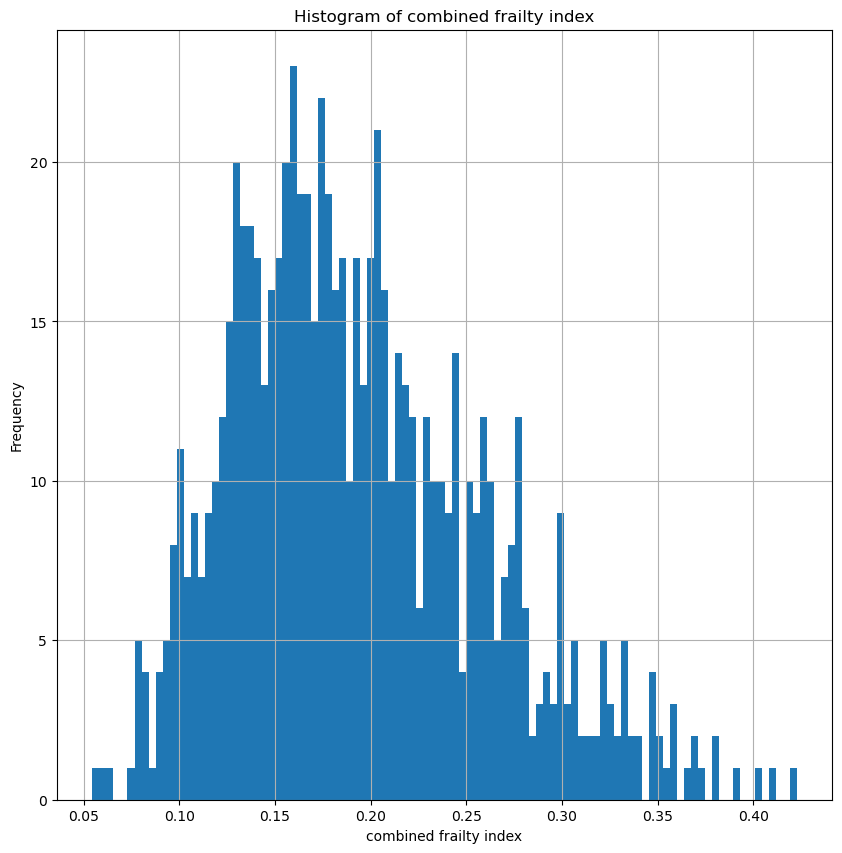

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'column_name' is your column
combined['merge_fi'].hist(bins=100)

plt.title('Histogram of combined frailty index')
plt.xlabel('combined frailty index')
plt.ylabel('Frequency')

plt.show()

